# Bob's Discount Furniture

In [80]:
from __future__ import division

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import xspec_utils as xs
from nice_tables import LatexTable

In [95]:
fd = xs.load_dict("results_spec/20160701_fiveann.json")

## Soft proton parameters as a function of radius

In [96]:
latex_hdr = [['Annulus', '2001 MOS', '2001 PN', '2009 MOS']]
latex_cols = ['{:s}', 0, 0, 0]
ltab = LatexTable(latex_hdr, latex_cols, "Soft proton power law indices", prec=2)

labels = ['0-100', '100-200', '200-300', '300-400', '400-500']
spectra = [np.array([1,3,5]),
           np.array([1,3,5]) + 5,
           np.array([1,3,5]) + 10,
           np.array([1,3,5]) + 15,
           np.array([1,3,5]) + 20]
spectra = [map(str, x) for x in spectra]

for lab, indices in zip(labels, spectra):
    ltr = [lab]
    for idx in indices:
        ltr.append(fd[idx]['sp']['powerlaw']['PhoIndex']['value'])
    ltab.add_row(*ltr)

print ltab

\begin{tabular}{@{}rrrr@{}}
\toprule
\multicolumn{4}{c}{Soft proton power law indices} \\
\midrule
Annulus & 2001 MOS & 2001 PN & 2009 MOS \\
\midrule
0-100 & 0.67 & 0.98 & 0.58 \\
100-200 & 0.42 & 0.50 & 0.43 \\
200-300 & 0.31 & 0.09 & 0.28 \\
300-400 & 0.34 & 0.09 & 0.32 \\
400-500 & 0.30 & 0.19 & 0.41 \\
\bottomrule
\end{tabular}


Hard to see for 0087940201 MOS1 case, but 200-300 powerlaw basically overlaps 400-500.
Behavior is broadly consistent with what we expect, actually, which is very reassuring.  Fits also get jumpier going outwards in radius.  But, outer annuli encompass larger annuli -- so the counts should still be pretty comparable.  I would actually expect outer annuli fits to be a bit better constrained

0087940201 MOS1
0-100: index 0.67, norm 1.74e-01
100-200: index 0.42, norm 6.07e-02
200-300: index 0.31, norm 4.74e-02
300-400: index 0.34, norm 5.08e-02
400-500: index 0.30, norm 4.82e-02


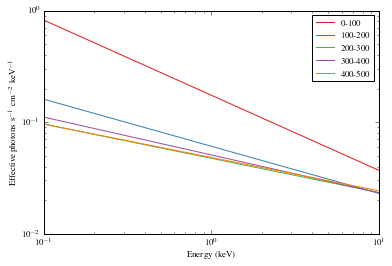

0087940201 MOS2
0-100: index 0.67, norm 1.72e-01
100-200: index 0.42, norm 6.55e-02
200-300: index 0.31, norm 4.82e-02
300-400: index 0.34, norm 5.41e-02
400-500: index 0.30, norm 4.92e-02


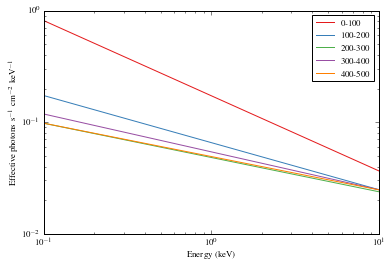

0087940201 PN
0-100: index 0.98, norm 7.26e-01
100-200: index 0.50, norm 1.16e-01
200-300: index 0.09, norm 5.50e-02
300-400: index 0.09, norm 4.96e-02
400-500: index 0.19, norm 6.41e-02


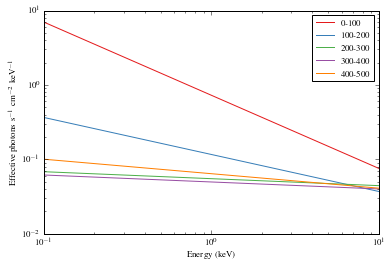

0551000201 MOS1
0-100: index 0.58, norm 9.80e-02
100-200: index 0.43, norm 6.24e-02
200-300: index 0.28, norm 4.60e-02
300-400: index 0.32, norm 4.59e-02
400-500: index 0.41, norm 3.47e-02


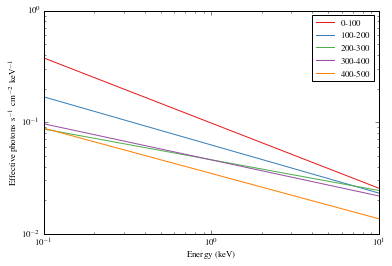

0551000201 MOS2
0-100: index 0.58, norm 3.69e-02
100-200: index 0.43, norm 1.59e-02
200-300: index 0.28, norm 1.04e-02
300-400: index 0.32, norm 1.21e-02
400-500: index 0.41, norm 1.55e-02


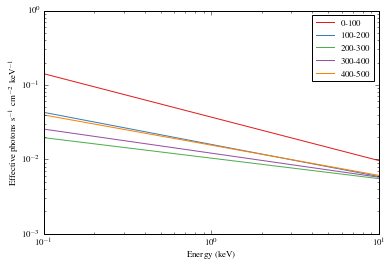

In [82]:
x = np.logspace(-1, 1)

for offset, exposure in enumerate(['0087940201 MOS1', '0087940201 MOS2', '0087940201 PN',
                                   '0551000201 MOS1','0551000201 MOS2']):
    print exposure
    for idx, lab in zip(np.array([1, 6, 11, 16, 21]) + offset,
                        ['0-100', '100-200', '200-300', '300-400', '400-500']):
        idx = str(idx)
        phoindex = fd[idx]['sp']['powerlaw']['PhoIndex']['value']
        norm = fd[idx]['sp']['powerlaw']['norm']['value']
        print "{:s}: index {:.2f}, norm {:.2e}".format(lab, phoindex, norm)
        plt.loglog(x, norm * x**(-1 * phoindex), label=lab)

    plt.legend(loc='best')
    plt.xlabel("Energy (keV)")
    plt.ylabel(r'Effective photons s$^{-1}$ cm$^{-2}$ keV$^{-1}$')
    plt.show()

## vnei fit parameters as a function of radius

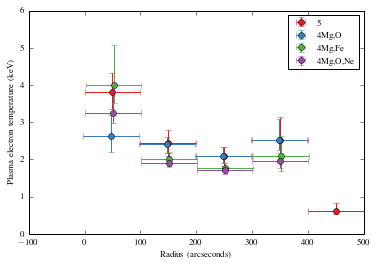

In [121]:
fd = xs.load_dict("results_spec/20160701_fiveann.json")
vals = []
p_errs = []
n_errs = []
for idx, model in zip(np.array([1, 6, 11, 16, 21]),
                  ['snr_ann_000_100', 'snr_ann_100_200', 'snr_ann_200_300', 'snr_ann_300_400', 'snr_ann_400_500']):
    c = fd[str(idx)][model]['vnei']['kT']
    vals.append(c['value'])
    p_errs.append(c['error'][1] - c['value'])
    n_errs.append(abs(c['error'][0] - c['value']))
plt.errorbar([50, 150, 250, 350, 450], vals, yerr=[n_errs, p_errs], xerr=50, marker='o', ls='', label='5')

fd = xs.load_dict("results_spec/20160708_fourann_center-mg-o-free.json")
vals = []
p_errs = []
n_errs = []
for idx, model in zip(np.array([1, 6, 11, 16]),
                  ['snr_ann_000_100', 'snr_ann_100_200', 'snr_ann_200_300', 'snr_ann_300_400']):
    c = fd[str(idx)][model]['vnei']['kT']
    vals.append(c['value'])
    p_errs.append(c['error'][1] - c['value'])
    n_errs.append(abs(c['error'][0] - c['value']))
plt.errorbar([48, 148, 248, 348], vals, yerr=[n_errs, p_errs], xerr=50, marker='o', ls='', label='4Mg,O')

fd = xs.load_dict("results_spec/20160708_fourann_center-mg-fe-free.json")
vals = []
p_errs = []
n_errs = []
for idx, model in zip(np.array([1, 6, 11, 16]),
                  ['snr_ann_000_100', 'snr_ann_100_200', 'snr_ann_200_300', 'snr_ann_300_400']):
    c = fd[str(idx)][model]['vnei']['kT']
    vals.append(c['value'])
    p_errs.append(c['error'][1] - c['value'])
    n_errs.append(abs(c['error'][0] - c['value']))
plt.errorbar([52, 152, 252, 352], vals, yerr=[n_errs, p_errs], xerr=50, marker='o', ls='', label='4Mg,Fe')

fd = xs.load_dict("results_spec/20160708_fourann_center-mg-o-ne-free.json")
vals = []
p_errs = []
n_errs = []
for idx, model in zip(np.array([1, 6, 11, 16]),
                  ['snr_ann_000_100', 'snr_ann_100_200', 'snr_ann_200_300', 'snr_ann_300_400']):
    c = fd[str(idx)][model]['vnei']['kT']
    vals.append(c['value'])
    p_errs.append(c['error'][1] - c['value'])
    n_errs.append(abs(c['error'][0] - c['value']))
plt.errorbar([51, 151, 251, 351], vals, yerr=[n_errs, p_errs], xerr=50, marker='o', ls='', label='4Mg,O,Ne')

plt.legend(loc='best')
plt.xlabel("Radius (arcseconds)")
plt.ylabel(r'Plasma electron temperature (keV)')
plt.show()

## Four annuli with varied center abundances

Please note: different JSON dumps have different structures etc., and may need to be regenerated

In [83]:
fdictfs = ["results_spec/20160708_fourann_center-mg-free_snr_ann_000_100.json",
          "results_spec/20160708_fourann_center-mg-o-free_snr_ann_000_100.json",
          "results_spec/20160708_fourann_center-mg-ne-free_snr_ann_000_100.json",
          "results_spec/20160708_fourann_center-mg-o-ne-free_snr_ann_000_100.json",
          "results_spec/20160708_fourann_center-mg-fe-free_snr_ann_000_100.json"
          ]
# fdictf = fit dict file
labels = ["4Mg", "4Mg,O", "4Mg,Ne", "4Mg,Ne,O", "4Mg,Fe"]

In [84]:
def val_pnerrs(fit_dict, model, comp):
    """Convenience method to extract
    value, +ve error, -ve error
    from a fit_dict.  Errors are signed (i.e., -ve error value is < 0)
    Arguments
        fit_dict: xspec_utils fit dict (i.e., JSON dict)
        model: model name (string)
        comp: component name (string)
    Returns:
        value, +ve error, -ve error three-tuple
    """
    c = fit_dict['comps'][model][comp]
    val = c['value']
    pos_err = c['error'][1] - c['value']
    neg_err = c['error'][0] - c['value']
    return val, pos_err, neg_err

In [130]:
latex_hdr = [['Annulus', ''],
             [r'$n_\mathrm{H}$', r'($10^{22} \unit{cm^{-2}}$)'],
             [r'$kT$', r'(keV)'],
             [r'$\tau$', r'($10^{10} \unit{s\;cm^{-3}}$)'],
             ['O', '(-)'],
             ['Ne', '(-)'],
             ['Mg', '(-)'],
             ['Si', '(-)'],
             ['S', '(-)'],
             ['Fe', '(-)'],
             [r'$\chi^2_{\mt{red}}$', r'$\chi^2 / (\mt{dof})$']]
latex_hdr = np.array(latex_hdr).T

latex_cols = ['{:s}', 2, 2, 2, 2, 2] + 4 * [2] + ['{:s}']  # O, Ne, Mg, Fe; chisqred
ltab = LatexTable(latex_hdr, latex_cols, "G309.2-0.6 annuli fit with errors", prec=2)

for fdictf, lab in zip(fdictfs, labels):
    
    fd = xs.load_dict(fdictf)
    
    ltr = [lab]
    ltr.extend(val_pnerrs(fd, 'tbnew_gas', 'nH'))
    ltr.extend(val_pnerrs(fd, 'vnei', 'kT'))
    ltr.extend(np.array(val_pnerrs(fd, 'vnei', 'Tau')) / 1e10)
    ltr.extend(val_pnerrs(fd, 'vnei', 'O'))
    ltr.extend(val_pnerrs(fd, 'vnei', 'Ne'))
    ltr.extend(val_pnerrs(fd, 'vnei', 'Mg'))
    ltr.extend(val_pnerrs(fd, 'vnei', 'Si'))
    ltr.extend(val_pnerrs(fd, 'vnei', 'S'))
    ltr.extend(val_pnerrs(fd, 'vnei', 'Fe'))
    
    # For "new" fit dicts
    #ltr.append("{:.3f} = {:.2f} / {:d}".format(fd['fitStat'] / fd['dof'], fd['fitStat'], fd['dof']))
    # For "old" fit dicts
    ltr.append("{:.3f} = {:.2f} / {:d}".format(fd['fitstat'][1] / fd['dof'], fd['fitstat'][1], fd['dof']))

    ltab.add_row(*ltr)

print ltab

\begin{tabular}{@{}rlllllllllr@{}}
\toprule
\multicolumn{11}{c}{G309.2-0.6 annuli fit with errors} \\
\midrule
Annulus & $n_\mathrm{H}$ & $kT$ & $\tau$ & O & Ne & Mg & Si & S & Fe & $\chi^2_{\mt{red}}$ \\
 & ($10^{22} \unit{cm^{-2}}$) & (keV) & ($10^{10} \unit{s\;cm^{-3}}$) & (-) & (-) & (-) & (-) & (-) & (-) & $\chi^2 / (\mt{dof})$ \\
\midrule
0-100 & ${2.15}^{+0.04}_{-0.09}$ & ${2.95}^{+0.36}_{-0.41}$ & ${1.50}^{+0.18}_{-0.17}$ & ${1.00}^{-1.00}_{-1.00}$ & ${1.00}^{-1.00}_{-1.00}$ & ${0.50}^{+0.08}_{-0.08}$ & ${1.63}^{+0.13}_{-0.11}$ & ${1.25}^{+0.33}_{-0.26}$ & ${1.00}^{-1.00}_{-1.00}$ & 1.403 = 3508.26 / 2500 \\
100-200 & ${2.10}^{+0.04}_{-0.06}$ & ${2.64}^{+0.55}_{-0.43}$ & ${1.57}^{+0.19}_{-0.18}$ & ${9.55}^{+1.60}_{-1.51}$ & ${1.00}^{-1.00}_{-1.00}$ & ${0.56}^{+0.09}_{-0.08}$ & ${1.86}^{+0.15}_{-0.14}$ & ${1.35}^{+0.34}_{-0.28}$ & ${1.00}^{-1.00}_{-1.00}$ & 1.365 = 3411.25 / 2499 \\
200-300 & ${2.14}^{+0.09}_{-0.07}$ & ${3.02}^{+0.56}_{-0.44}$ & ${1.50}^{+0.17}_{-0.17}$ & ${1.00